<IPython.core.display.Javascript object>


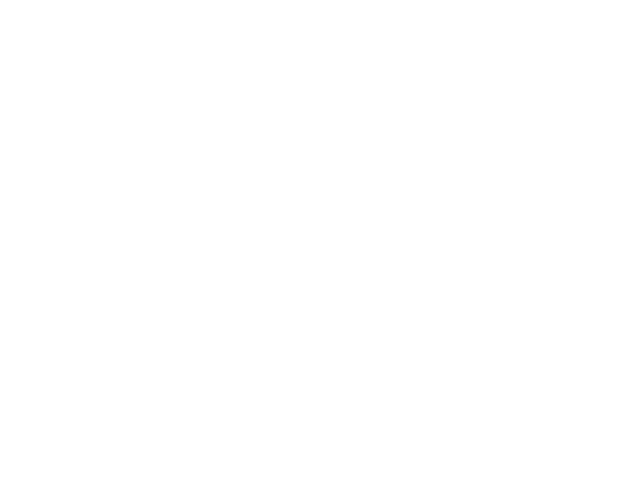

(0, 1)

In [1]:
%matplotlib inline
%matplotlib notebook

import numpy as np, math
import matplotlib.pyplot as plt

# Create sample dataset
xvalues = np.linspace(20,100, 100)
yvalues = np.array([((np.cos((x-50)/100)*100 + np.sin(x/100)*100 + np.random.normal(0, 13, 1)[0])/150.0) for x in xvalues])
ymin = np.amin(yvalues)
yvalues = [y - ymin for y in yvalues]

# Plot dataset
fig0, ax0 = plt.subplots()
ax0.plot(xvalues,
        yvalues, "ro", linewidth = 2, color = 'red', label = 'target')
ax0.set_xlim(20, 100)
ax0.set_ylim(0, 1)


<IPython.core.display.Javascript object>


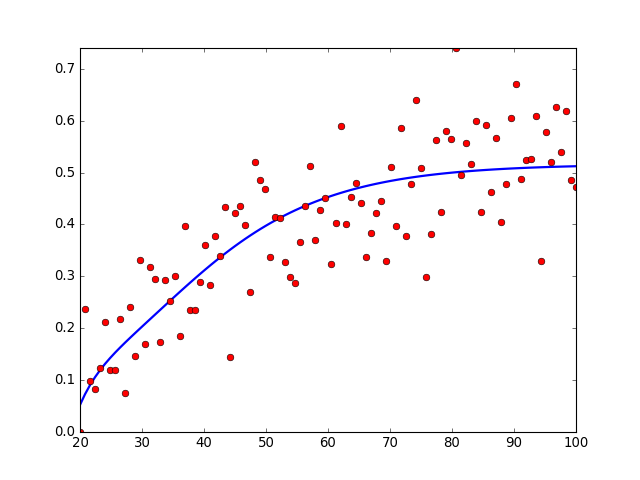

In [2]:
%matplotlib inline
%matplotlib notebook

#----------
# build the dataset
#----------
from pybrain.datasets import SupervisedDataSet
import numpy as np, math
from nn_utils import train_nn

ds = SupervisedDataSet(1, 1)
for x, y in zip(xvalues, yvalues):
    ds.addSample((x,), (y,))

#----------
# build the network
#----------
net = train_nn(xvalues, yvalues, rate=0.0001, layers = [100,100,100], batch=False, magnification=0.0, iterations = 50)
    

In [6]:
from streamsx.topology.topology import Topology
from my_module import array_yielder, neural_net_model
from streamsx.topology import context
from jupyter_utilities import get_next_line, graph_from_outstream
import time, sys
import matplotlib.pyplot as plt
import random

# Define test data
xdata_raw = [random.uniform(0,100) for x in range(100)]

# Define operators
ay = array_yielder(xdata_raw)
nnm = neural_net_model(net)

# Build Graph
top = Topology("myTop")
stream_ = top.source(ay)
stream_.transform(nnm).print()
# Submit
out = context.submit("STANDALONE", top.graph)

#graph_from_outstream(out, xdata_raw, 20, 100, 0, 1)

May 24, 2016 3:42:18 PM com.ibm.streamsx.topology.internal.streams.InvokeMakeToolkit invoke
INFO: Invoking spl-make-toolkit
May 24, 2016 3:42:18 PM com.ibm.streamsx.topology.internal.streams.InvokeMakeToolkit invoke
INFO: /opt/ibm/InfoSphere_Streams/4.1.1.0/bin/spl-make-toolkit -i /home/streamsadmin/scratch/tk3779226712171603185
May 24, 2016 3:42:19 PM com.ibm.streamsx.topology.internal.streams.InvokeMakeToolkit invoke
INFO: spl-make-toolkit complete: return code=0
May 24, 2016 3:42:19 PM com.ibm.streamsx.topology.internal.streams.InvokeSc getToolkitPath
INFO: ToolkitPath:/home/streamsadmin/git/streamsx.topology/com.ibm.streamsx.topology:/opt/ibm/InfoSphere_Streams/4.1.1.0/toolkits:/opt/ibm/InfoSphere_Streams/4.1.1.0/toolkits
May 24, 2016 3:42:19 PM com.ibm.streamsx.topology.internal.streams.InvokeSc invoke
INFO: Invoking SPL compiler (sc) for main composite: myTop::myTop
May 24, 2016 3:42:19 PM com.ibm.streamsx.topology.internal.streams.InvokeSc invoke
INFO: /opt/ibm/InfoSphere_Stream

In [7]:
top.graph.printJSON()

{
    "config": {
        "includes": [
            {
                "source": "/home/streamsadmin/scratch/my_module.py",
                "target": "opt/python/modules"
            },
            {
                "source": "/usr/lib/python3.5/site-packages/pybrain",
                "target": "opt/python/packages"
            },
            {
                "source": "/usr/lib/python3.5/site-packages/numpy",
                "target": "opt/python/packages"
            },
            {
                "source": "/usr/lib/python3.5/site-packages/scipy",
                "target": "opt/python/packages"
            },
            {
                "source": "/usr/lib/python3.5/site-packages/PIL",
                "target": "opt/python/packages"
            },
            {
                "source": "/home/streamsadmin/git/streamsx.topology/com.ibm.streamsx.topology/opt/python/packages/streamsx",
                "target": "opt/python/packages"
            }
        ]
    },
    "name": "myTo

In [5]:
while True:
    print(g())

TypeError: 'generator' object is not callable